In [124]:
import pandas as pd

def reduce_csv_to_1000_rows(input_csv, output_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)

    # If the dataset has more than 1000 rows, randomly sample 1000 rows
    if len(df) > 1000:
        df_reduced = df.sample(n=10100, random_state=42)  # random_state for reproducibility
    else:
        df_reduced = df  # if there are fewer than 1000 rows, keep all rows

    # Save the reduced dataset to a new CSV file
    df_reduced.to_csv(output_csv, index=False)

    print(f"Data reduced and saved to {output_csv}")

# Example usage
input_csv = 'merge_all_text.csv'  # Replace with your input CSV file path
output_csv = 'reduced_output.csv'  # Replace with your desired output file path
reduce_csv_to_1000_rows(input_csv, output_csv)


Data reduced and saved to reduced_output.csv


In [70]:
import pandas as pd
import ast
from datetime import datetime, timezone

df = pd.read_csv('Original Data.csv')  # Replace 'your_file.csv' with your actual file path

# Create DataFrame
post_data = pd.DataFrame(df)

# Step 1: Combine Title, Text, and Comments Data into separate rows

# Convert Comments Data from string format to list
post_data['Comments Data'] = post_data['Comments Data'].apply(ast.literal_eval)

# Prepare the DataFrame for expanding to multiple rows
expanded_data = []

# Add the Title and Text as separate rows
for _, row in post_data.iterrows():
    # Add the title as a row
    expanded_data.append({'Text': row['Title'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add the text (if available)
    if row['Text']:
        expanded_data.append({'Text': row['Text'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add each comment as a separate row
    for comment in row['Comments Data']:
        expanded_data.append({'Text': comment[0], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(comment[2], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': comment[1], 'Subreddit': row['Subreddit']})

# Create the expanded DataFrame
expanded_df = pd.DataFrame(expanded_data)

expanded_df.to_csv('merge_all_text.csv', index=False)  # Saves the cleaned data to a new file

print(expanded_df)



                                                    Text  Category  \
0      Are you ok with the DOD removing articles from...  No Slang   
1                                                    NaN  No Slang   
2                Navajo code talkers are still not back.  No Slang   
3      I’m just thinking about how these are the same...  No Slang   
4      Anyone who is okay with this does not respect ...  No Slang   
...                                                  ...       ...   
97785  This is why the DA will usually bring multiple...  No Slang   
97786  True or until the two parties reach a plea agr...  No Slang   
97787  Not all public defenders are state employees. ...  No Slang   
97788  To hear my buddy tell it, that wasn't the issu...  No Slang   
97789  Hmmm, usually ignorance of the law is not a de...  No Slang   

                      Date  Upvotes          Subreddit  
0      2025-03-18 12:05:01     7614          AskReddit  
1      2025-03-18 12:05:01     7614          

# Exploratory Data Analysis

In [115]:
import pandas as pd

# Load the CSV file
file_path = "reduced_output.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10038 non-null  object
 1   Category   10100 non-null  object
 2   Date       10100 non-null  object
 3   Upvotes    10100 non-null  int64 
 4   Subreddit  10100 non-null  object
dtypes: int64(1), object(4)
memory usage: 394.7+ KB


(None,
                                                 Text  Category  \
 0  This man is a cut above the rest, outdoor or i...  No Slang   
 1                                      Why not four?  No Slang   
 2                                          MAGA baby  No Slang   
 3  I doubt even ChatGPT would come up with a stor...  No Slang   
 4  I feel that's kinda true but at the same time ...  No Slang   
 
                   Date  Upvotes  Subreddit  
 0  2025-03-18 12:36:49        1     soccer  
 1  2025-03-15 16:30:40        5      funny  
 2  2025-03-18 04:43:41        1  AskReddit  
 3  2025-03-18 12:48:15       87     gaming  
 4  2025-03-18 12:43:17        1     soccer  )

In [116]:
df_eda = df.copy()
df_eda.describe()

,Upvotes
count,10100.000000
mean,78.394257
std,1641.629572
min,-167.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,104279.000000


In [117]:
df_eda.isnull().sum()

Text         62
Category      0
Date          0
Upvotes       0
Subreddit     0
dtype: int64

In [118]:
df_eda.duplicated().sum()


np.int64(6)

<Axes: >

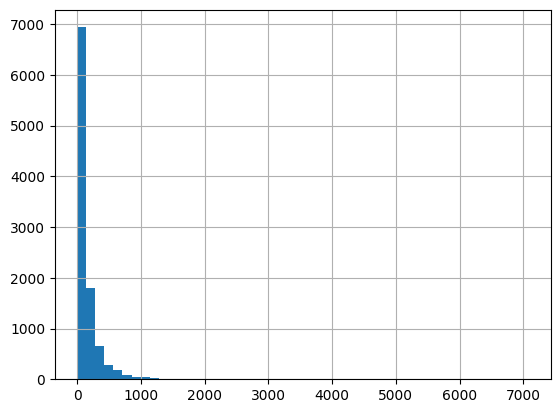

In [ ]:
# Now apply the len() function safely
df_eda['Text_length'] = df_eda['Text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Visualize the distribution of text lengths
df_eda['Text_length'].hist(bins=50)


<Axes: >

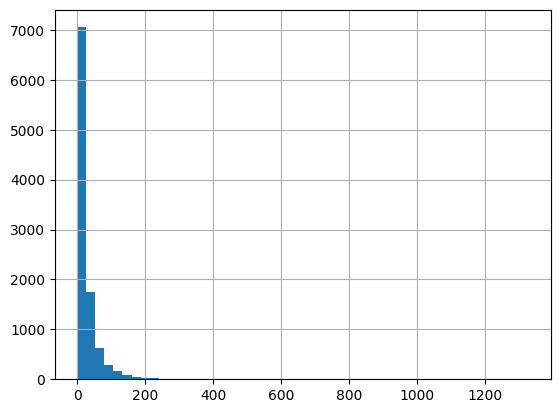

In [120]:
df_eda['Word_count'] = df_eda['Text'].apply(lambda x: len(x.split()))
df_eda['Word_count'].hist(bins=50)


In [127]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df_eda["Cleaned_Text"] = df_eda["Text"].apply(clean_text)

In [128]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

all_words = ' '.join(df_eda['Cleaned_Text']).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)  # Top 20 most common words
common_words


[('like', 1408),
 ('people', 934),
 ('dont', 919),
 ('one', 827),
 ('im', 767),
 ('would', 741),
 ('get', 736),
 ('game', 712),
 ('time', 659),
 ('think', 606),
 ('even', 582),
 ('also', 516),
 ('really', 494),
 ('good', 491),
 ('thats', 486),
 ('know', 478),
 ('still', 464),
 ('make', 448),
 ('much', 435),
 ('games', 417)]

C:\Users\andif\AppData\Local\Temp\ipykernel_29708\1471698888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette='viridis')


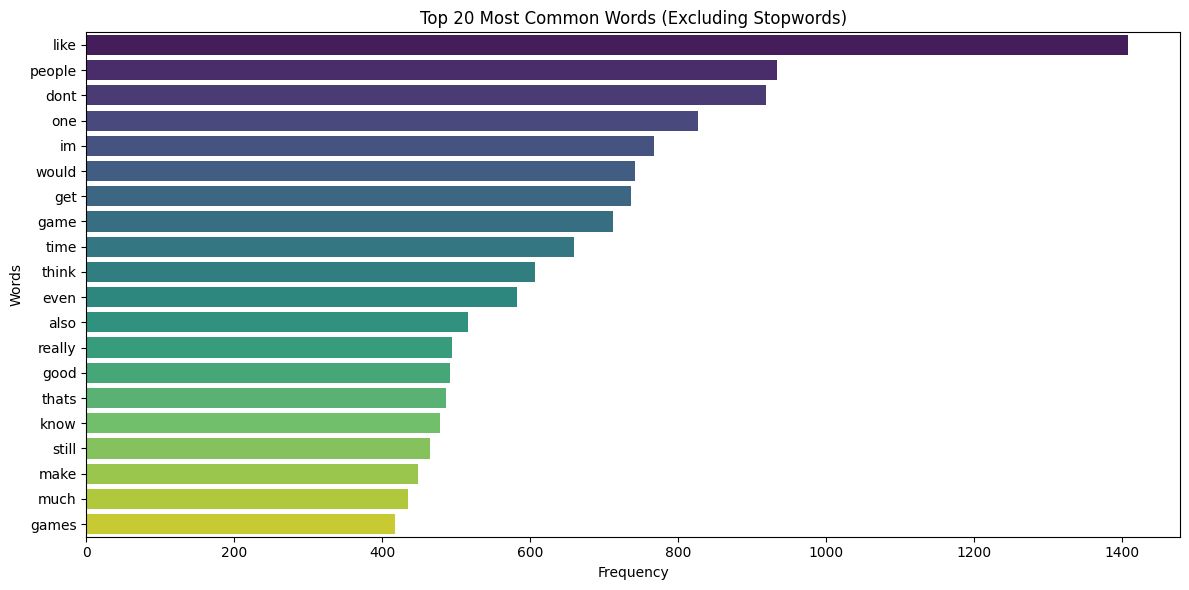

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unpack words and their frequencies
words, frequencies = zip(*common_words)

# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')

# Add titles and labels
plt.title('Top 20 Most Common Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()

plt.show()



<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit'>

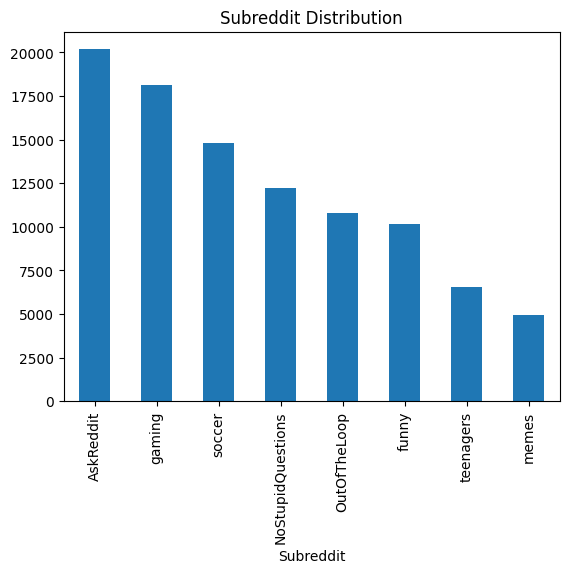

In [101]:
df_eda['Subreddit'].value_counts().plot(kind='bar', title='Subreddit Distribution')

In [102]:
# Ensure 'Date' column is in datetime format
df_eda['Date'] = pd.to_datetime(df_eda['Date'], errors='coerce')
# Extract time-based features
df_eda['Hour'] = df_eda['Date'].dt.hour
df_eda['DayOfWeek'] = df_eda['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_eda['Month'] = df_eda['Date'].dt.month
df_eda['Year'] = df_eda['Date'].dt.year


<Axes: title={'center': 'Posts per Hour'}, xlabel='Hour'>

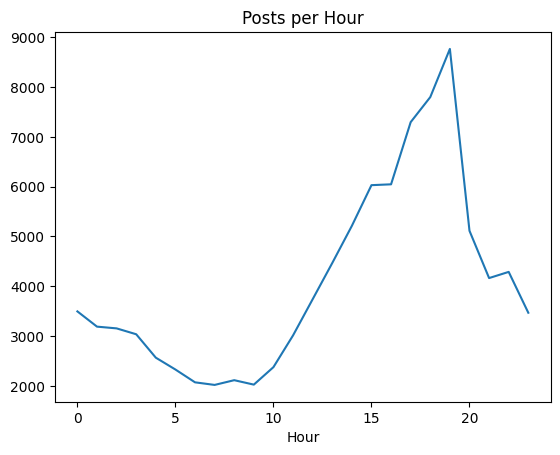

In [103]:
# Plot the distribution of posts by hour
df_eda['Hour'].value_counts().sort_index().plot(kind='line', title='Posts per Hour')


<Axes: title={'center': 'Posts per Day of Week'}, xlabel='DayOfWeek'>

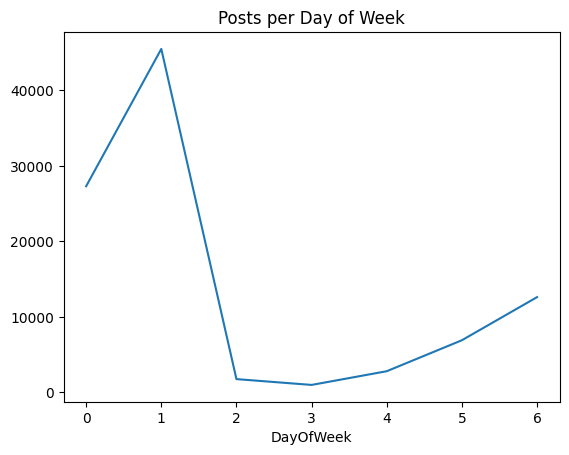

In [104]:
# Plot the distribution of posts by day of the week
df_eda['DayOfWeek'].value_counts().sort_index().plot(kind='line', title='Posts per Day of Week')


<Axes: title={'center': 'Posts per Month'}, xlabel='Month'>

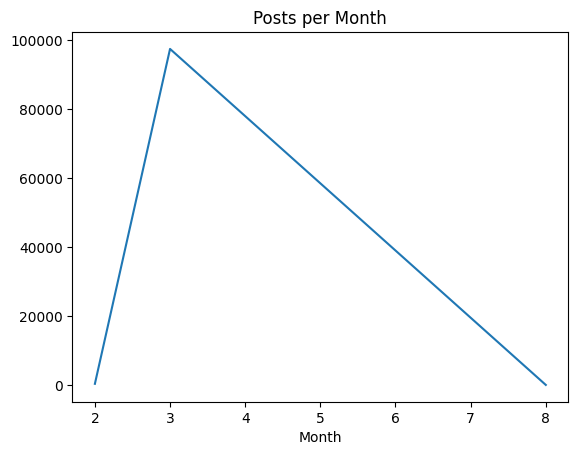

In [105]:
# Plot the distribution of posts by month
df_eda['Month'].value_counts().sort_index().plot(kind='line', title='Posts per Month')

<Axes: title={'center': 'Posts per Year'}, xlabel='Year'>

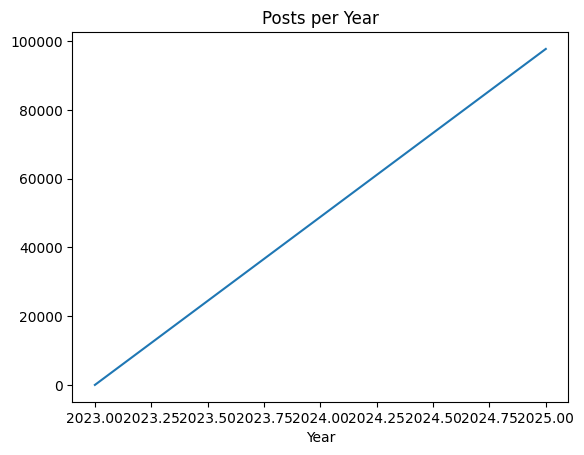

In [106]:
# Plot the distribution of posts by year
df_eda['Year'].value_counts().sort_index().plot(kind='line', title='Posts per Year')

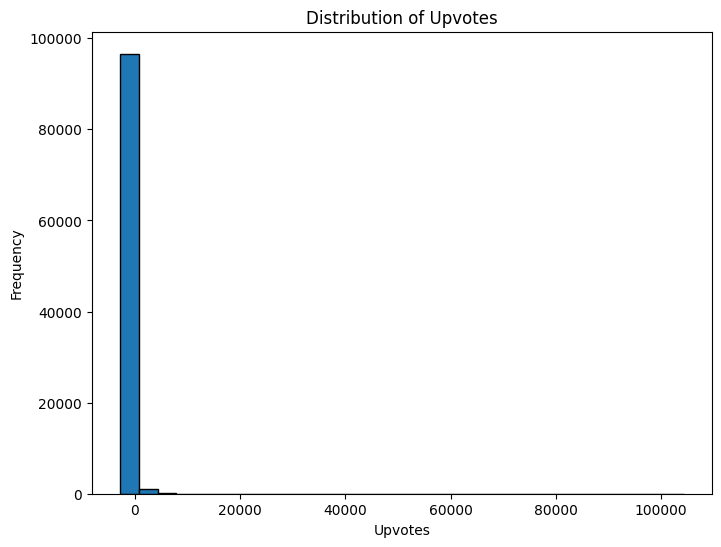

In [109]:
import matplotlib.pyplot as plt

# Plot distribution of Upvotes
plt.figure(figsize=(8, 6))
plt.hist(df_eda['Upvotes'], bins=30, edgecolor='black')
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing & Transformation

In [110]:
import pandas as pd

# Load the CSV file
file_path = "reduced_output.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1002 non-null   object
 1   Category   1010 non-null   object
 2   Date       1010 non-null   object
 3   Upvotes    1010 non-null   int64 
 4   Subreddit  1010 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.6+ KB


(None,
                                                 Text  Category  \
 0  This man is a cut above the rest, outdoor or i...  No Slang   
 1                                      Why not four?  No Slang   
 2                                          MAGA baby  No Slang   
 3  I doubt even ChatGPT would come up with a stor...  No Slang   
 4  I feel that's kinda true but at the same time ...  No Slang   
 
                   Date  Upvotes  Subreddit  
 0  2025-03-18 12:36:49        1     soccer  
 1  2025-03-15 16:30:40        5      funny  
 2  2025-03-18 04:43:41        1  AskReddit  
 3  2025-03-18 12:48:15       87     gaming  
 4  2025-03-18 12:43:17        1     soccer  )

In [111]:
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already installed)
nltk.download('punkt')
nltk.download('stopwords')

# Salin dataframe untuk diolah
df_cleaned = df.copy()

# --- Step 1: Data Cleaning ---
# Hapus baris dengan Text yang kosong
df_cleaned = df_cleaned.dropna(subset=['Text'])

# Hapus duplikat (jika ada)
df_cleaned = df_cleaned.drop_duplicates()

# Hapus URL, simbol aneh, dan lowercase
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df_cleaned["Cleaned_Text"] = df_cleaned["Text"].apply(clean_text)

# --- Step 2: Tokenization & Stopwords Removal ---
# Tokenisasi dan menghapus stopwords
stop_words = set(stopwords.words("english"))  # set of common stopwords

def tokenize_and_remove_stopwords(text):
    # Tokenisasi
    tokens = word_tokenize(text)
    # Hapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df_cleaned["Processed_Text"] = df_cleaned["Cleaned_Text"].apply(tokenize_and_remove_stopwords)

# --- Step 3: Data Transformation ---
# Ubah kolom Date ke datetime
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], errors="coerce")

# --- Step 4: Encoding untuk klasifikasi nanti ---
# Label encoding kategori dan subreddit
df_cleaned["Category_Label"] = df_cleaned["Category"].astype("category").cat.codes

# Tampilkan hasil akhir sebagian
df_cleaned[["Processed_Text", "Category", "Category_Label", "Date","Upvotes", "Subreddit"]].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Processed_Text,Category,Category_Label,Date,Upvotes,Subreddit
0,man cut rest outdoor inside,No Slang,0,2025-03-18 12:36:49,1,soccer
1,four,No Slang,0,2025-03-15 16:30:40,5,funny
2,maga baby,No Slang,0,2025-03-18 04:43:41,1,AskReddit
3,doubt even chatgpt would come story stupid bun...,No Slang,0,2025-03-18 12:48:15,87,gaming
4,feel thats kinda true time also true smaller t...,No Slang,0,2025-03-18 12:43:17,1,soccer


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Step 4: Text Vectorization (TF-IDF) ---
# Gunakan TF-IDF pada Cleaned_Text
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # ambil 1000 kata paling penting
    stop_words='english',  # hilangkan stop words
    ngram_range=(1, 2)  # unigram dan bigram
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned["Cleaned_Text"])

# Bentuk dari hasil TF-IDF
tfidf_matrix.shape

(1002, 1000)

In [113]:
print(df_cleaned)

                                                   Text  Category  \
0     This man is a cut above the rest, outdoor or i...  No Slang   
1                                         Why not four?  No Slang   
2                                             MAGA baby  No Slang   
3     I doubt even ChatGPT would come up with a stor...  No Slang   
4     I feel that's kinda true but at the same time ...  No Slang   
...                                                 ...       ...   
1005  A sounds better. Also sounds like a way to get...  No Slang   
1006  embarrassed watching this. \n\nGreat finish fr...  No Slang   
1007  Nervous and awkward. Don't expect it to be mag...  No Slang   
1008                                           Feminine  No Slang   
1009                                       Omg, genius.  No Slang   

                    Date  Upvotes          Subreddit  \
0    2025-03-18 12:36:49        1             soccer   
1    2025-03-15 16:30:40        5              funny   
2  

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Split data
X = df_cleaned["Cleaned_Text"]
y = df_cleaned["Category_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# 3. Train model
pipeline.fit(X_train, y_train)

# 4. Predict & evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int8(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Data
X = df_cleaned["Cleaned_Text"]
y = df_cleaned["Category_Label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline templates
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

# Loop through models
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    pipeline = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1,2))),
        ("clf", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
